In [2]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [46]:
def avg_channel(img,q1=0.25,q2=0.75):
    avg = []
    for i in range(3):
        channel = img[:,:,i]
        iqr_min = np.quantile(channel,q1)
        iqr_max = np.quantile(channel,q2)
        iqm_img = channel[np.where((channel > iqr_min)&(channel < iqr_max))]
        avg.append([iqr_min,iqm_img.mean(),iqr_max])
    return avg

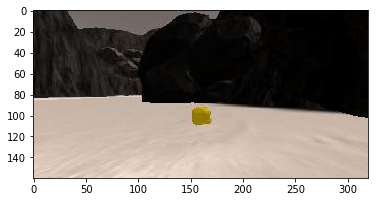

In [3]:
# Idnetifying rock color threshold

example_rock = "calibration_images/example_rock1.jpg"
rock_img = mpimg.imread(example_rock)
plt.imshow(rock_img)

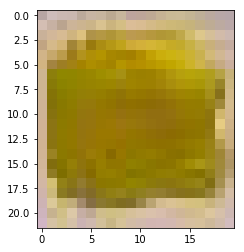

In [4]:
single_rock = rock_img[90:112,151:171,:]
plt.imshow(single_rock)

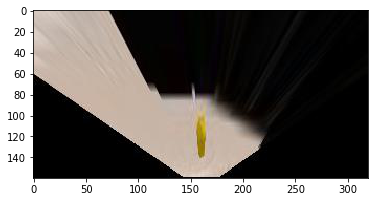

In [15]:
warped_example_rock = "warped_example.jpg"
warped_img = mpimg.imread(warped_example_rock)
plt.imshow(warped_img)

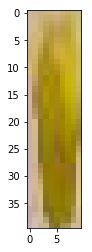

In [43]:
single_rock_w = warped_img[100:140,155:165,:]
plt.imshow(single_rock_w)

In [45]:
avg_channel(single_rock)

[[145.0, 168.43778801843317, 202.25],
 [120.0, 143.1504854368932, 179.0],
 [0.75, 42.6605504587156, 135.0]]

In [56]:
avg_channel(single_rock_w,q2=0.7)

[[152.0, 176.78735632183907, 200.0],
 [128.75, 151.36206896551724, 176.0],
 [13.0, 49.0, 100.29999999999995]]

> using both averages to determine best mask for detecting rocks
yields better results than using either one